## Covariane and Pearson's r, an explaining notebook
#### Created on Thu Jan 19 19:24:13 2017
19 Jan 2017 
@author: lui


Covariance Definition:
The mean value of the product of the deviations of two variates from their respective means

Informally covariance indicates the relationship between two variables,it is positive if both go up
and negative if one goes up and the other goes down, in other words it is a measure of correlation.
It is important to note that the relashionship is linear,covariance is unable to detect any other type of relationship.
So when we have points very close to an ideal line with positive slope we have positive covariance, when the line has negative slope we have negative covariance.
Only the sign of the covariance is important,not the value which in this kind of measurement is not standardized.


This is the formula to compute covariance for the sample,substitute n to n-1 for the population:

\begin{equation}
cov(x,y) = \frac{\displaystyle\sum^n_{i=1} (x_i - \overline{x} )(y_i - \overline{y} ) }{n-1} 
\end{equation}


Pearson's r definition:
the Pearson correlation coefficient (PCC, pronounced /ˈpɪərsən/), also referred to as the Pearson's r or Pearson product-moment correlation coefficient (PPMCC), is a measure of the linear dependence (correlation) between two variables X and Y.

In practice it does what covariance does but better because it has these two advantages:
1) It is standardized,always has a range between -1 to 1 
2) The higher the absolute value of the number the stronger the correlation in that direction


Images from wikipedia:

|fig a |fig b|
|---|---|
|![alt](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)   | ![alt](https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png)  |
|Several sets of (x, y) points, with the correlation coefficient of x and y for each set.|Examples of scatter diagrams with different values of correlation coefficient (ρ)|


This is the formula:

$$
\begin{equation}
\displaystyle r(x,y) = \frac{Cov(x,y)}{\sigma(x) \sigma(y)}
\end{equation}
$$

The covariance divided by the product of the standard deviations

In [3]:
"""
Created on Thu Jan 19 19:24:13 2017
19 Jan 2017 
Covariane e and Pearson's r
@author: lui_2
"""

"\nCreated on Thu Jan 19 19:24:13 2017\n19 Jan 2017 \nCovariane e and Pearson's r\n@author: lui_2\n"

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

from numpy import std,mean,array,cov,round
from scipy.stats.stats import pearsonr

In [9]:
def mycov(a, b,sample_population=False):
    ''' 
    Compute covariance,if sample_population is True then the resulting value
    is for the sample otherwise it is for the population
    '''
    assert len(a)==len(b)
    res = sum( (a-mean(a)) * (b-mean(b)) ) / (len(a)-1*sample_population)
    return res

def mypearsonr(a, b):
    ''' 
    Compute pearson's r
    '''
    assert len(a)==len(b)
    res = mycov(a,b) / ( std(a) * std(b) )
    return res    
    
    
def plot_regression_line(a,b):
    ''' 
    Plot the two sets of point a and b together with the regressions line
    to show the correlation
    '''
    plt.scatter(a,b)
    fit = np.polyfit(a, b, 1)
    fit_fn = np.poly1d(fit) 
    plt.plot(a,b, '', a, fit_fn(a), '--k')
    red_patch = mpatches.Patch(color='red', label='cov =' +str(mycov(a,b)) )
    green_patch = mpatches.Patch(color='green', label='pearson''s r=' +str(round(mypearsonr(a,b),2)) )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,handles=[red_patch,green_patch])
    plt.show()
    
def print_info(a,b,title=''):
    '''
    Print a bunch of info for sanity check
    '''
    print(title)
    print("covariance {0:.2}".format( mycov(a,b)/(std(a)*std(b)) ))
    print("numpy covariance {0:.2}".format( cov(a,b)[0][1]  ))
    print("pearson r {0:.2}".format( mypearsonr(a,b) ))
    print("scipy pearson r {0:.2}".format( pearsonr(a,b)[0] ))


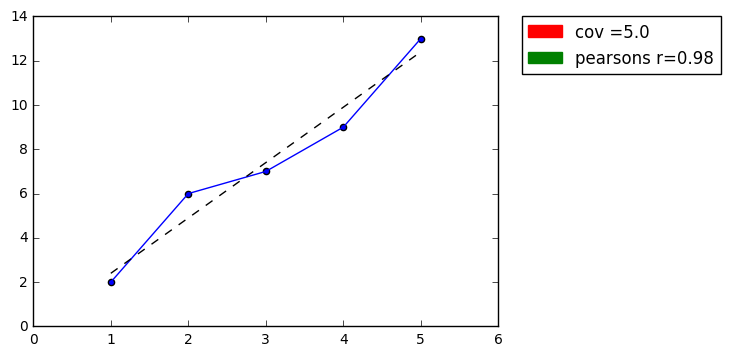

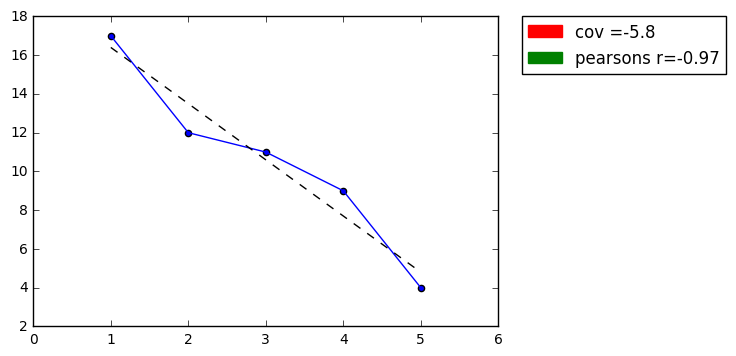

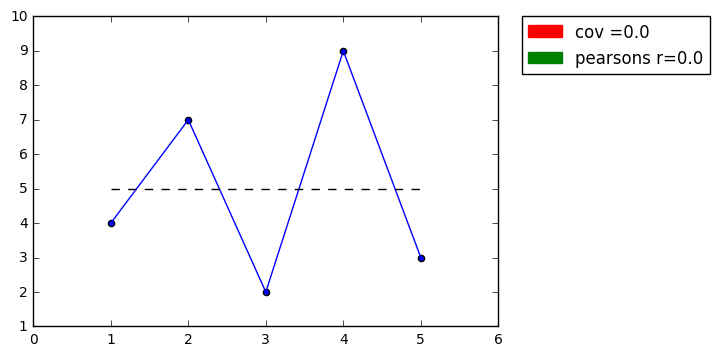

--Set a,b--
covariance 0.98
numpy covariance 6.2
pearson r 0.98
scipy pearson r 0.98
--Set a,c--
covariance -0.97
numpy covariance -7.2
pearson r -0.97
scipy pearson r -0.97
--Set a,d--
covariance 0.0
numpy covariance 0.0
pearson r 0.0
scipy pearson r 0.0


In [11]:
# Main
a = array([1,2,3,4,5])
b = array([2,6,7,9,13])
c = array([17,12,11,9,4])
d = array([4,7,2,9,3] )

plot_regression_line(a,b)
plot_regression_line(a,c)
plot_regression_line(a,d)

print_info(a,b,"--Set a,b--")
print_info(a,c,"--Set a,c--")
print_info(a,d,"--Set a,d--")


References:

[Understanding Covariance](https://www.youtube.com/watch?v=xGbpuFNR1ME)

[The covariance matrix](https://www.youtube.com/watch?v=locZabK4Als)

[Understanding Correlation](https://www.youtube.com/watch?v=4EXNedimDMs)
